In [4]:
import pandas as pd


In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [13]:
df = pd.read_csv("earthquake_data_tsunami.csv")

In [14]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [15]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

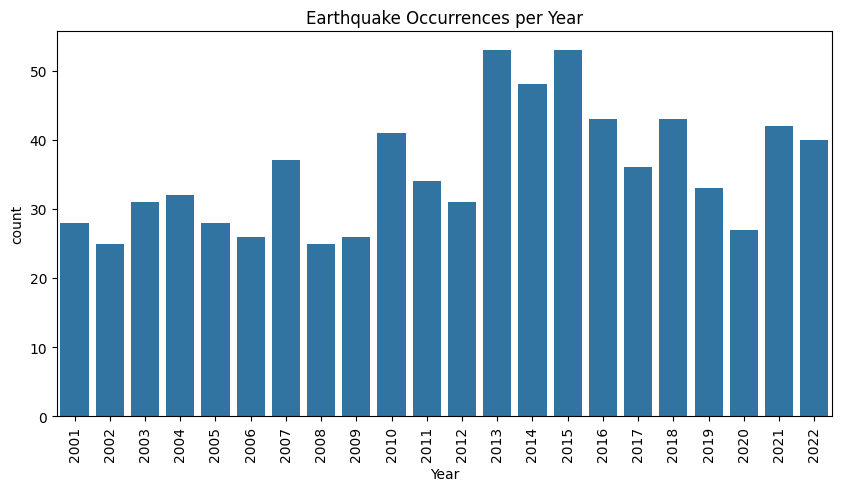

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Year', data=df)
plt.xticks(rotation=90)
plt.title("Earthquake Occurrences per Year")
plt.show()


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

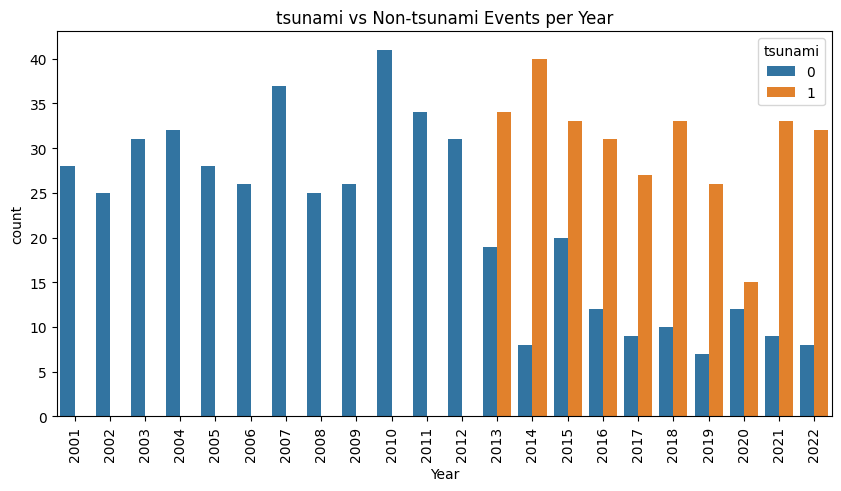

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Year', hue='tsunami', data=df)
plt.title("tsunami vs Non-tsunami Events per Year")
plt.xticks(rotation=90)
plt.show()


In [19]:
df.columns


Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [25]:
df.rename(columns={
    'magnitude': 'Magnitude',
    'depth': 'Depth',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'tsunami': 'Tsunami'
}, inplace=True)


In [26]:
df['Tsunami'] = df['Tsunami'].fillna(0).astype(int)


In [27]:
major_quakes = df[df['Magnitude'] >= 8.0]

major_quakes[['Year', 'Month', 'Magnitude', 'Depth', 'Latitude', 'Longitude']].head()


,Year,Month,Magnitude,Depth,Latitude,Longitude
56,2021,8,8.1,22.79,-58.4157,-25.3206
59,2021,7,8.2,46.66,55.4742,-157.9170
60,2021,7,8.2,35.00,55.3154,-157.8290
74,2021,3,8.1,28.93,-29.7466,-177.2240
129,2019,5,8.0,122.57,-5.8119,-75.2697


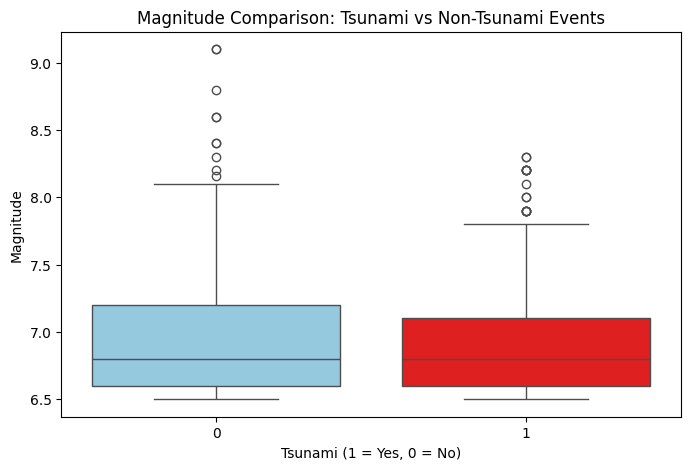

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Tsunami', 
    y='Magnitude',
    hue='Tsunami',
    data=df,
    palette={0: 'skyblue', 1: 'red'},
    legend=False
)
plt.title("Magnitude Comparison: Tsunami vs Non-Tsunami Events")
plt.xlabel("Tsunami (1 = Yes, 0 = No)")
plt.ylabel("Magnitude")
plt.show()


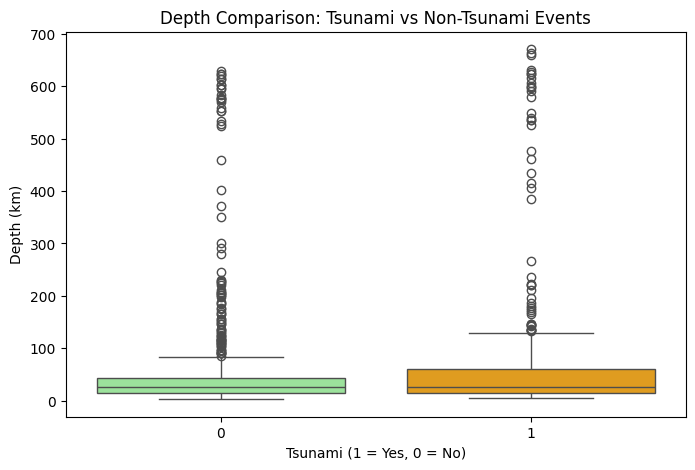

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Tsunami', 
    y='Depth',
    hue='Tsunami',
    data=df,
    palette={0: 'lightgreen', 1: 'orange'},
    legend=False
)
plt.title("Depth Comparison: Tsunami vs Non-Tsunami Events")
plt.xlabel("Tsunami (1 = Yes, 0 = No)")
plt.ylabel("Depth (km)")
plt.show()


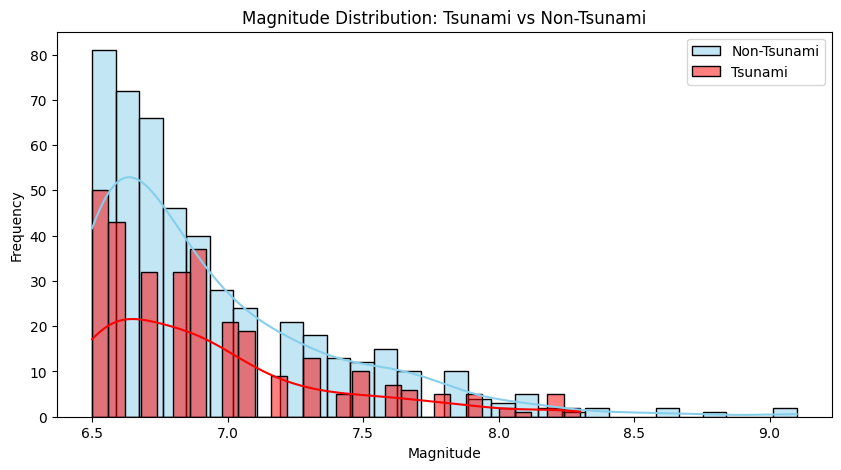

In [32]:
# Histogram: Magnitude Distribution (Tsunami vs Non-Tsunami)
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Tsunami']==0]['Magnitude'], bins=30, color='skyblue', label='Non-Tsunami', kde=True)
sns.histplot(df[df['Tsunami']==1]['Magnitude'], bins=30, color='red', label='Tsunami', kde=True)
plt.title("Magnitude Distribution: Tsunami vs Non-Tsunami")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.legend()
plt.show()


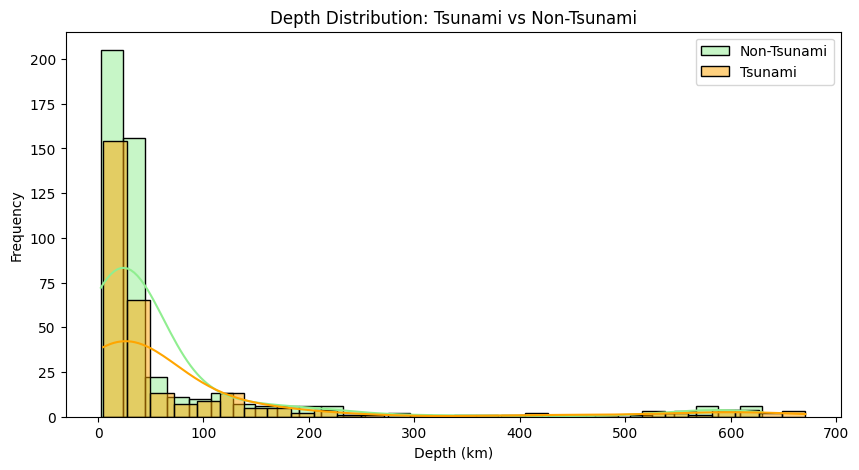

In [33]:
# Histogram: Depth Distribution (Tsunami vs Non-Tsunami)
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Tsunami']==0]['Depth'], bins=30, color='lightgreen', label='Non-Tsunami', kde=True)
sns.histplot(df[df['Tsunami']==1]['Depth'], bins=30, color='orange', label='Tsunami', kde=True)
plt.title("Depth Distribution: Tsunami vs Non-Tsunami")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


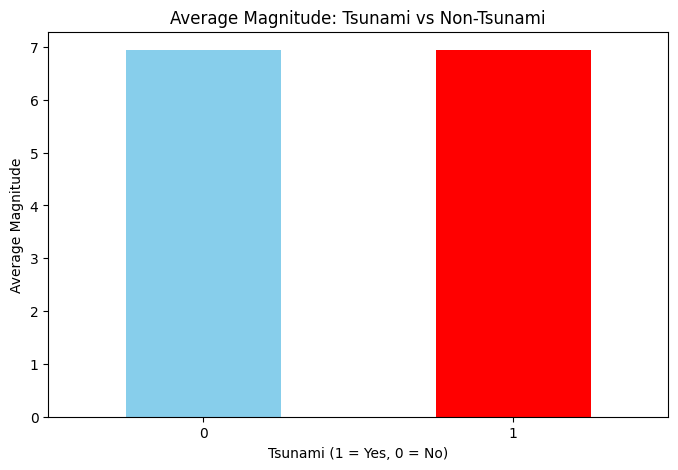

In [34]:
# Bar Chart: Average Magnitude by Tsunami Category
plt.figure(figsize=(8,5))
df.groupby('Tsunami')['Magnitude'].mean().plot(kind='bar', color=['skyblue','red'])
plt.title("Average Magnitude: Tsunami vs Non-Tsunami")
plt.xlabel("Tsunami (1 = Yes, 0 = No)")
plt.ylabel("Average Magnitude")
plt.xticks(rotation=0)
plt.show()

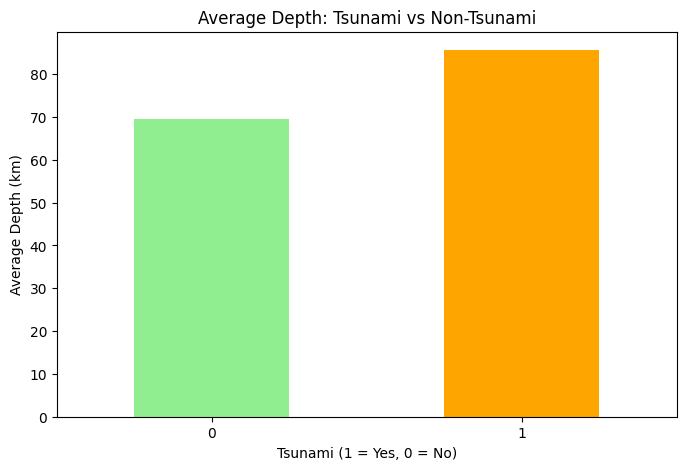

In [35]:
# Bar Chart: Average Depth by Tsunami Category
plt.figure(figsize=(8,5))
df.groupby('Tsunami')['Depth'].mean().plot(kind='bar', color=['lightgreen','orange'])
plt.title("Average Depth: Tsunami vs Non-Tsunami")
plt.xlabel("Tsunami (1 = Yes, 0 = No)")
plt.ylabel("Average Depth (km)")
plt.xticks(rotation=0)
plt.show()

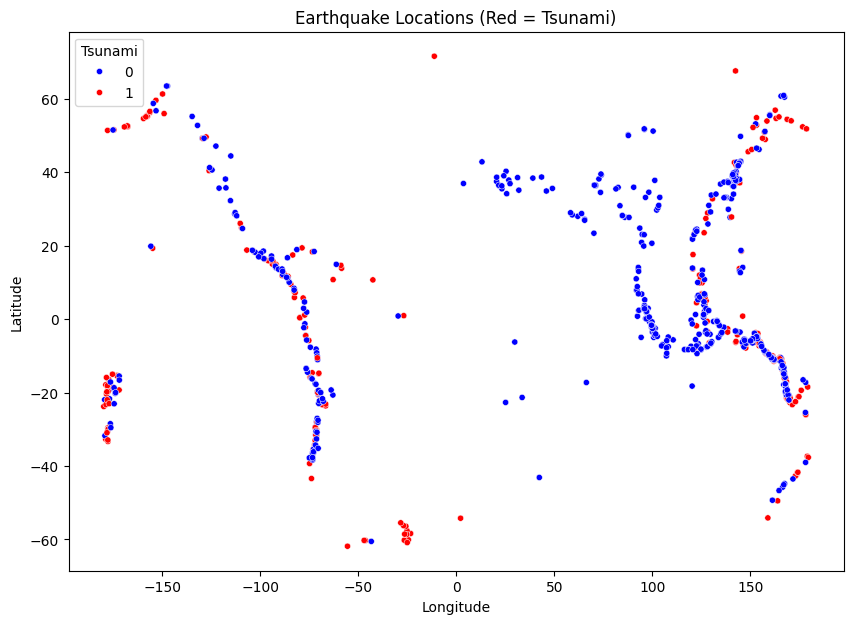

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue='Tsunami',
    data=df,
    palette=['blue','red'],
    s=20
)
plt.title("Earthquake Locations (Red = Tsunami)")
plt.show()


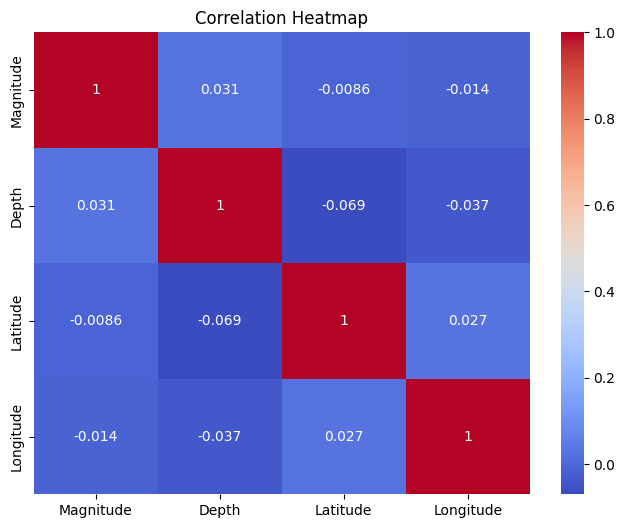

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Magnitude', 'Depth', 'Latitude', 'Longitude']].corr(), 
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
